In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt

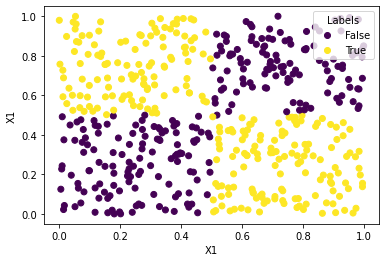

In [2]:
#Simulate two features and ground truth labels.
X = np.random.rand(500,2)
y = np.zeros((500,1))
y = ((X[:,0]<0.5)*(X[:,1]>=0.5)*1) + ((X[:,0]>=0.5)*(X[:,1]<0.5)*1)
X = np.concatenate((X,(X[:,0]*X[:,1]).reshape(500,1)),axis=1)

scatter = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("X1")
plt.ylabel("X1")
plt.legend(handles=scatter.legend_elements()[0],title="Labels",labels=['False','True'])
plt.show()

Here is where we are going to fit our simple neural network, to try to accurately predict the outcome label.

Questions: 

* What is the topology of the initial network? Describe it. 
* Can we do better by adding another 'linear' layer?
* Can we do better by adding more nodes to our 'linear' layer? 
* Can we do better by changing the activation function?


Epoch 1/150
8/8 [==============================] - 1s 30ms/step - loss: 0.2773 - mse: 0.2773 - mae: 0.4936 - val_loss: 0.2814 - val_mse: 0.2814 - val_mae: 0.4996
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.2741 - mse: 0.2741 - mae: 0.4932 - val_loss: 0.2786 - val_mse: 0.2786 - val_mae: 0.4992
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.2719 - mse: 0.2719 - mae: 0.4934 - val_loss: 0.2762 - val_mse: 0.2762 - val_mae: 0.4988
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.2698 - mse: 0.2698 - mae: 0.4932 - val_loss: 0.2739 - val_mse: 0.2739 - val_mae: 0.4985
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.2678 - mse: 0.2678 - mae: 0.4930 - val_loss: 0.2717 - val_mse: 0.2717 - val_mae: 0.4981
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.2659 - mse: 0.2659 - mae: 0.4931 - val_loss: 0.2695 - val_mse: 0.2695 - val_mae: 0.4978
Epoch 7/150
8/8 [================

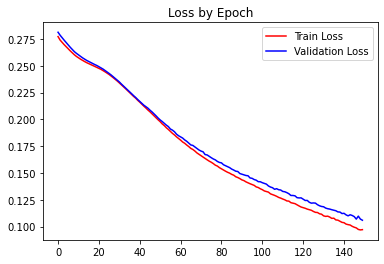

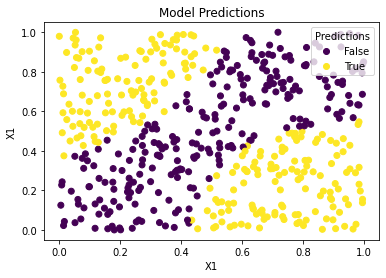

In [22]:
model = keras.Sequential([
      layers.Dense(units=32, activation='relu', input_shape=(3,)),
      layers.Dense(units=16, activation='relu'),
      layers.Dense(units=2, activation='softmax'),
      layers.Dense(units=1, activation='sigmoid')
      #layers.Dense(units=1,activation="linear")
])

model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['mse','mae'])

history = model.fit(X,y,epochs=150,batch_size=50,validation_split=0.2)

plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.legend(['Train Loss','Validation Loss'])
plt.title("Loss by Epoch")
plt.show()

predictions = model(X)
scatter = plt.scatter(X[:,0],X[:,1],c=(predictions.numpy()>0.5))
plt.xlabel("X1")
plt.ylabel("X1")
plt.legend(handles=scatter.legend_elements()[0],title="Predictions",labels=['False','True'])
plt.title("Model Predictions")
plt.show()

Set these things aside for now we will come back to them later.

In [ ]:
# X = np.divide(X,np.max(X))
# X = np.concatenate((X,(X[:,0]*X[:,1]).reshape(500,1)),axis=1)